# Rabobank Coding Assignment
# Sarah Ilyas

## Objective 

The purpose of this projest is to carry out Binary classification and to answer the question:  “If you buy some McDonald’s stock (MCD) today, are you guaranteed to make at least 10% profit in
the coming 10 working days?”

In [3]:
!pip install finta  #Install necessary libraries
!pip install imbalanced-learn 

In [391]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime
from finta import TA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import subprocess
import shlex
import zipfile
import openpyxl
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  
import warnings
warnings.filterwarnings("ignore")

## Importing the Data

The purpose of the code chunk below is to download files from the specified URLs, unzip a ZIP archive, and list the files in the current directory while ensuring that each command doesn't exceed the specified timeout. It provides a level of control and robustness when executing potentially time-consuming shell commands.

In [392]:


# Define the timeout value (in seconds)
timeout_seconds = 120

# Define the wget commands
wget_commands = [
    "wget -O label_raw.csv 'https://docs.google.com/uc?export=download&id=1cp5YFvszZuFw3IusD6EWKfL8AeCSf9Lg' -q --show-progress",
    "wget -O features.zip 'https://docs.google.com/uc?export=download&id=1BawB1Zm43rmk7HMftFWnwizN-cyd7nnD' -q --show-progress",
    "unzip features.zip",
    "ls"
]

for wget_command in wget_commands:
    try:
        # Split the command into a list
        command_list = shlex.split(wget_command)
        
        # Execute the command with a timeout
        subprocess.run(command_list, timeout=timeout_seconds)
    except subprocess.TimeoutExpired:
        print(f"Command '{wget_command}' timed out after {timeout_seconds} seconds.")
    except Exception as e:
        print(f"An error occurred while running the command '{wget_command}': {str(e)}")



     0K .......... .......... .......... .......... ..........  5%  783K 1s
    50K .......... .......... .......... .......... .......... 10% 5.79M 1s
   100K .......... .......... .......... .......... .......... 15%  963K 1s
   150K .......... .......... .......... .......... .......... 21% 1.48M 1s
   200K .......... .......... .......... .......... .......... 26% 2.94M 0s
   250K .......... .......... .......... .......... .......... 31%  443K 1s
   300K .......... .......... .......... .......... .......... 37% 12.3M 0s
   350K .......... .......... .......... .......... .......... 42%  837K 0s
   400K .......... .......... .......... .......... .......... 47% 15.2M 0s
   450K .......... .......... .......... .......... .......... 53%  412K 0s
   500K .......... .......... .......... .......... .......... 58% 38.6M 0s
   550K .......... .......... .......... .......... .......... 63% 59.0M 0s
   600K .......... .......... .......... .......... .......... 69% 5.02M 0s
   650K ...

Archive:  features.zip
Advanced_Programming_assignment_2_data.R
Applications
Assignment.R
Assignment1.R
Assignment_1_21208374.Rmd
Assignment_1_21208374.pdf
Assignment_1_Statistical_Network_Analysis_21208374.Rmd
Assignment_2
Business_Science_102
Creative Cloud Files
Desktop
Documents
Downloads
Final_project_advanced_programming_21208374.R
Inflation
Inflation.xlsx
Invoice_6_Sarah.docx
Library
Movies
Music
Pictures
Public
Rabobank Assignment 3.ipynb
Rabobank Assignment 4.ipynb
Rabobank Assignment Final-2.ipynb
Rabobank_Assignment-Copy1.ipynb
Rabobank_Assignment-Copy2.ipynb
Rabobank_Assignment.ipynb
Raisin_Dataset.xlsx
Sarah Ilyas - Rabobank Assignment.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
Untitled5.ipynb
Untitled6.ipynb
Untitled7.ipynb
Untitled8.ipynb
Untitled9.ipynb
anaconda3
average_2000_2015.gif
average_unemployment_bar_chart_animation.gif
average_unemployment_bar_chart_animation_2000_2015.gif
average_unemployment_by_year_animation.gif
fea

replace features.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [393]:
#Below, I import the given csv file, convert it into a pandas DataFrame object,
#convert the Date column into a datetime format and then display the first few rows of the dataframe  

# Define the CSV file name
csv_file = 'label_raw.csv'

# Read the data from the CSV file into a DataFrame
df1 = pd.read_csv(csv_file)

# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Display the first few rows of the DataFrame
(df1.head())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1966-07-05,0.0,0.004074,0.003982,0.004013,388800,0.0,0.0
1,1966-07-06,0.0,0.004227,0.003982,0.004227,687200,0.0,0.0
2,1966-07-07,0.0,0.004335,0.004044,0.004074,1853600,0.0,0.0
3,1966-07-08,0.0,0.004120,0.003982,0.004120,1238400,0.0,0.0
4,1966-07-11,0.0,0.004227,0.004059,0.004105,655200,0.0,0.0


In [394]:
zip_file = 'features.zip'

# Open the ZIP file in read mode using a context manager ('with' statement)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    
    # Get a list of file names inside the ZIP archive
    file_list = zip_ref.namelist()
    # Print the list of file names
    print(file_list)



['features.xlsx']


In [395]:

# Specify the name of the XLSX file inside the ZIP archive.
xlsx_file = 'features.xlsx'

# Open the ZIP file for reading
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Check if the XLSX file exists inside the ZIP archive
    if xlsx_file in zip_ref.namelist():
        # Extract the XLSX file and load it using openpyxl
        with zip_ref.open(xlsx_file) as file:
            workbook = openpyxl.load_workbook(file)

        # Access the sixth sheet by its index 
        sheet_index = 5  # Index 1 corresponds to the second sheet
        sheet = workbook.worksheets[sheet_index]

        # Convert the sheet to a Pandas DataFrame
        data = sheet.values
        df = pd.DataFrame(data, columns=next(data))

        # Display the DataFrame to view the contents
        (df.head())
        

        # Close the workbook 
        workbook.close()




## Labelling the Data

In [396]:

# Define a function to find the maximum value in the column 'Low' in a window of 10 rows (after the purchase date)
def find_max_low(df, start_index):
    window = df.iloc[start_index+1 : start_index + 11]
    max_low = window['Low'].max()
    return max_low

# Create an empty list to store the results
result_max_low_values = []

# Iterate through the DataFrame
for index, row in df1.iterrows():
    if index <= len(df1) - 10:
        # Find the maximum 'Low' value in the next 10 rows
        max_low_value = find_max_low(df1, index)
        result_max_low_values.append(max_low_value)
    else:
        # If there are fewer than 10 rows left, break out of the loop
        break



In [397]:
high_column_length = len(df1['High']) #Find the number of rows in the column 'High'
diff_length = high_column_length - len(result_max_low_values) #Calculate the difference in the lengths of the 'High' column
#and the new 'result_max_low_values' vector


# Append 0 values to result_max_low_values to match the length of the other columns present in the dataframe
result_max_low_values.extend([np.nan] * diff_length)

df1['Max_Low']=result_max_low_values #Name the result_max_low_values vector as 'Max_Low' and add it as a new column to the 
#df1 dataframe


In [398]:
#View the last 10 rows of df1
last_10_rows = df1.tail(10)

(last_10_rows.head())

#Remove the last 9 rows of the df1 since they are not labelled
df1=df1.dropna()

(last_10_rows.head()) #The last 9 rows have been removed from the Dataframe


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Max_Low
13718,2021-01-04,214.490005,214.720001,208.220001,210.220001,4055400,0.0,0.0,213.119995
13719,2021-01-05,210.179993,211.949997,209.619995,211.479996,2576100,0.0,0.0,NaN
13720,2021-01-06,211.300003,211.710007,209.029999,211.000000,3083400,0.0,0.0,NaN
13721,2021-01-07,213.220001,213.220001,210.559998,211.979996,3142000,0.0,0.0,NaN
13722,2021-01-08,212.899994,216.119995,212.229996,215.869995,2637800,0.0,0.0,NaN


In [399]:

# Calculate the Percentage Difference between Max_Low and High for all rows and add it as a new column 
df1['Percentage_Difference'] = ((df1['Max_Low'] - df1['High']) / df1['High']) * 100

# Print the updated DataFrame
(df1.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Max_Low,Percentage_Difference
0,1966-07-05,0.0,0.004074,0.003982,0.004013,388800,0.0,0.0,0.004059,-0.375942
1,1966-07-06,0.0,0.004227,0.003982,0.004227,687200,0.0,0.0,0.004059,-3.985550
2,1966-07-07,0.0,0.004335,0.004044,0.004074,1853600,0.0,0.0,0.004059,-6.360412
3,1966-07-08,0.0,0.004120,0.003982,0.004120,1238400,0.0,0.0,0.004059,-1.486996
4,1966-07-11,0.0,0.004227,0.004059,0.004105,655200,0.0,0.0,0.004028,-4.710121


In [400]:

# If the Percentage difference is greater than 10, assign a 1 to the relevant observation in the Label 
#column, otherwise assign a 0. 
df1['Label'] = (df1['Percentage_Difference'] >= 10.000).astype(int)


# Print the updated DataFrame to show the newly created Label column
(df1.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Max_Low,Percentage_Difference,Label
0,1966-07-05,0.0,0.004074,0.003982,0.004013,388800,0.0,0.0,0.004059,-0.375942,0
1,1966-07-06,0.0,0.004227,0.003982,0.004227,687200,0.0,0.0,0.004059,-3.985550,0
2,1966-07-07,0.0,0.004335,0.004044,0.004074,1853600,0.0,0.0,0.004059,-6.360412,0
3,1966-07-08,0.0,0.004120,0.003982,0.004120,1238400,0.0,0.0,0.004059,-1.486996,0
4,1966-07-11,0.0,0.004227,0.004059,0.004105,655200,0.0,0.0,0.004028,-4.710121,0


In [401]:


# Set the cutoff date to 01/01/2021
cutoff_date = pd.to_datetime('2021-01-01')

# Count the number of rows where 'Label' is equal to 1 and 'Date' is until the cutoff date
count_positive_labels = len(df1[(df1['Label'] == 1) & (df1['Date'] <= cutoff_date)])

print("Number of rows with Label equal to 1 until 01/01/2021:", count_positive_labels)





Number of rows with Label equal to 1 until 01/01/2021: 504


In [402]:
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Max_Low,Percentage_Difference,Label
0,1966-07-05,0.0,0.004074,0.003982,0.004013,388800,0.0,0.0,0.004059,-0.375942,0
1,1966-07-06,0.0,0.004227,0.003982,0.004227,687200,0.0,0.0,0.004059,-3.985550,0
2,1966-07-07,0.0,0.004335,0.004044,0.004074,1853600,0.0,0.0,0.004059,-6.360412,0
3,1966-07-08,0.0,0.004120,0.003982,0.004120,1238400,0.0,0.0,0.004059,-1.486996,0
4,1966-07-11,0.0,0.004227,0.004059,0.004105,655200,0.0,0.0,0.004028,-4.710121,0


From the output above, we can confirm that the number of rows labelled '1' until 2021-01-01 is equal to **504**. 

## Feature Extraction

In this project I have extracted a feature from 1 sheet of the given features.xlsx file. In the cell below, I extract data from the sheet titled 'Usda_ErsMeatPriceSpreads'.

In [403]:
#This code is primarily concerned with converting date data in the 'Usda_ErsMeatPriceSpreads' sheet to datetime format,
#sorting the DataFrame by date (in ascending order), and displaying the sorted DataFrame.

# Convert the 'rec_vld_dts' column to datetime format
df['rec_vld_dts'] = pd.to_datetime(df['rec_vld_dts'])

# Sort the DataFrame 'df' by the 'rec_vld_dts' column in ascending order
df_sorted = df.sort_values(by='rec_vld_dts', ascending=True)

# Print the sorted DataFrame 'df_sorted'
(df_sorted.head())


,rec_vld_dts,load_dts,commodity,variable,value,country,unit
5526,1970-01-01,2020-12-21 04:27:00,pork,byproduct allowance,4.300000,USA,cents per pound of retail equivalent
11009,1970-01-01,2020-12-21 04:27:00,beef,share farm to wholesale spread,14.720812,USA,percent
4282,1970-01-01,2020-12-21 04:27:00,beef,net farm value,61.400000,USA,cents per pound of retail equivalent
3071,1970-01-01,2020-12-21 04:27:00,beef,spreads farm to wholesale,14.500000,USA,cents per pound of retail equivalent
6753,1970-01-01,2020-12-21 04:27:00,pork,gross farm value,52.300000,USA,cents per pound of retail equivalent


The code chunk below extracts the retail value of beef from the 'Usda_ErsMeatPriceSpreads' sheet and sorts the selected observations with respect to the column 'rec_vld_dts'. I also create a new column which only extracts the year and the month for each selected observation from the 'rec_vld_dts' column. This column will be required in the later parts of the feature extraction process.  

In [404]:
# Select observations from the dataframe where the value of the variable 'commodity' is 'beef' and the value of
#the column 'variable' is 'retail value'
df_sorted = df_sorted[(df_sorted['commodity'] == 'beef') & (df['variable'] == 'retail value')]


# Create a new column 'YearMonth' by extracting the year and month from 'rec_vld_dts'
df_sorted['YearMonth'] = df_sorted['rec_vld_dts'].dt.to_period('M')

# Print the sorted DataFrame
(df_sorted.head())




,rec_vld_dts,load_dts,commodity,variable,value,country,unit,YearMonth
1844,1970-01-01,2020-12-21 04:27:00,beef,retail value,98.5,USA,cents per pound of retail equivalent,1970-01
1900,1970-02-01,2020-12-21 04:27:00,beef,retail value,98.3,USA,cents per pound of retail equivalent,1970-02
1956,1970-03-01,2020-12-21 04:27:00,beef,retail value,100.6,USA,cents per pound of retail equivalent,1970-03
2012,1970-04-01,2020-12-21 04:27:00,beef,retail value,101.1,USA,cents per pound of retail equivalent,1970-04
2068,1970-05-01,2020-12-21 04:27:00,beef,retail value,100.7,USA,cents per pound of retail equivalent,1970-05


In [405]:

# Create a new column for year and month
df1['YearMonth'] = df1['Date'].dt.to_period('M')

df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Max_Low,Percentage_Difference,Label,YearMonth
0,1966-07-05,0.0,0.004074,0.003982,0.004013,388800,0.0,0.0,0.004059,-0.375942,0,1966-07
1,1966-07-06,0.0,0.004227,0.003982,0.004227,687200,0.0,0.0,0.004059,-3.985550,0,1966-07
2,1966-07-07,0.0,0.004335,0.004044,0.004074,1853600,0.0,0.0,0.004059,-6.360412,0,1966-07
3,1966-07-08,0.0,0.004120,0.003982,0.004120,1238400,0.0,0.0,0.004059,-1.486996,0,1966-07
4,1966-07-11,0.0,0.004227,0.004059,0.004105,655200,0.0,0.0,0.004028,-4.710121,0,1966-07


In [406]:
# Merge the dataframe for the beef retail value and the stock dataframe based on the 'YearMonth' column
result_df = pd.merge(df1, df_sorted, left_on='YearMonth', right_on='YearMonth', how='left')

result_df=result_df.dropna()# Drop the NaN values created after merging the dataframes  
result_df.head() #Display the result

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Max_Low,Percentage_Difference,Label,YearMonth,rec_vld_dts,load_dts,commodity,variable,value,country,unit
852,1970-01-02,0.005283,0.005437,0.005283,0.005437,2825600,0.0,0.0,0.005529,1.694905,0,1970-01,1970-01-01,2020-12-21 04:27:00,beef,retail value,98.5,USA,cents per pound of retail equivalent
853,1970-01-05,0.005437,0.005529,0.005406,0.005529,2210400,0.0,0.0,0.005529,0.000072,0,1970-01,1970-01-01,2020-12-21 04:27:00,beef,retail value,98.5,USA,cents per pound of retail equivalent
854,1970-01-06,0.005529,0.005621,0.005529,0.005560,1951200,0.0,0.0,0.005529,-1.639424,0,1970-01,1970-01-01,2020-12-21 04:27:00,beef,retail value,98.5,USA,cents per pound of retail equivalent
855,1970-01-07,0.005560,0.005621,0.005529,0.005529,2728800,0.0,0.0,0.005529,-1.639336,0,1970-01,1970-01-01,2020-12-21 04:27:00,beef,retail value,98.5,USA,cents per pound of retail equivalent
856,1970-01-08,0.005529,0.005575,0.005529,0.005529,2242400,0.0,0.0,0.005345,-4.132157,0,1970-01,1970-01-01,2020-12-21 04:27:00,beef,retail value,98.5,USA,cents per pound of retail equivalent


In [407]:
columns_to_drop = ['load_dts','commodity','variable','country','unit','Date', 'Percentage_Difference', 'Max_Low','rec_vld_dts','YearMonth'] 
#Select the columns that won't be needed

X_selected = result_df.drop(columns=columns_to_drop) # Drop the columns
X_selected.rename(columns={'value': 'beef_retail'}, inplace=True) #Rename the column for beef retail value to beef_retail 

(X_selected.head()) #Display the results

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Label,beef_retail
852,0.005283,0.005437,0.005283,0.005437,2825600,0.0,0.0,0,98.5
853,0.005437,0.005529,0.005406,0.005529,2210400,0.0,0.0,0,98.5
854,0.005529,0.005621,0.005529,0.005560,1951200,0.0,0.0,0,98.5
855,0.005560,0.005621,0.005529,0.005529,2728800,0.0,0.0,0,98.5
856,0.005529,0.005575,0.005529,0.005529,2242400,0.0,0.0,0,98.5


## Feature Engineering

In [408]:
# List of symbols for technical indicators that will be used by the indicator_data function
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

X = X_selected 
X.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
#Column names are switched to lowercase because finta uses the lowercase names
(X.head())

,open,high,low,close,volume,Dividends,Stock Splits,Label,beef_retail
852,0.005283,0.005437,0.005283,0.005437,2825600,0.0,0.0,0,98.5
853,0.005437,0.005529,0.005406,0.005529,2210400,0.0,0.0,0,98.5
854,0.005529,0.005621,0.005529,0.005560,1951200,0.0,0.0,0,98.5
855,0.005560,0.005621,0.005529,0.005529,2728800,0.0,0.0,0,98.5
856,0.005529,0.005575,0.005529,0.005529,2242400,0.0,0.0,0,98.5


In [409]:
def indicator_data(data):
 
    #This function uses the finta API to calculate technical indicators used as the features
    # and returns a modified DataFrame with calculated indicators
    
    
    # Loop through the list of technical indicators defined in INDICATORS
    for indicator in INDICATORS:
        # Calculate the indicator using the finta library
        ind_data = eval('TA.' + indicator + '(data)')
        
        # Check if the result is not already a DataFrame, convert it if necessary
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        
        # Merge the calculated indicator data into the original DataFrame 'data' using the index
        data = data.merge(ind_data, left_index=True, right_index=True)
    
    # Rename a specific column to match the expected name
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    # Calculate additional moving averages for features and normalize volume
    data['ema50'] = data['close'] / data['close'].ewm(50).mean()
    data['ema21'] = data['close'] / data['close'].ewm(21).mean()
    data['ema15'] = data['close'] / data['close'].ewm(14).mean()
    data['ema5'] = data['close'] / data['close'].ewm(5).mean()
    data['normVol'] = data['volume'] / data['volume'].ewm(5).mean()

    # Remove columns that won't be used as features (open, high, low, volume)
    del (data['high'])
    del (data['low'])
    del (data['volume'])
    del (data['open'])

    return data

# Call indicator_data function with DataFrame 'X' and store the result in 'data'
data = indicator_data(X)

# Print the column names of the modified DataFrame
print(data.columns)

# Print the modified DataFrame 'data' with calculated indicators
data.head()


Index(['close', 'Dividends', 'Stock Splits', 'Label', 'beef_retail',
       '14 period RSI', 'MACD', 'SIGNAL', '14 period STOCH %K', 'MFV',
       '14 period ATR', 'MOM', '14 period MFI', 'ROC', 'OBV', '20 period CCI',
       '14 period EMV', 'VIm', 'VIp', 'ema50', 'ema21', 'ema15', 'ema5',
       'normVol'],
      dtype='object')


,close,Dividends,Stock Splits,Label,beef_retail,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,...,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
852,0.005437,0.0,0.0,0,98.5,NaN,0.000000,0.000000,NaN,2.825600e+06,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
853,0.005529,0.0,0.0,0,98.5,100.000000,0.000002,0.000001,NaN,5.036000e+06,...,2210400.0,66.666667,NaN,NaN,NaN,1.008319,1.008206,1.008111,1.007633,0.887698
854,0.005560,0.0,0.0,0,98.5,100.000000,0.000004,0.000002,NaN,4.385572e+06,...,4161600.0,92.860033,NaN,NaN,NaN,1.009146,1.008946,1.008780,1.007956,0.856966
855,0.005529,0.0,0.0,0,98.5,77.851042,0.000003,0.000002,NaN,1.656772e+06,...,1432800.0,61.331146,NaN,NaN,NaN,1.002648,1.002467,1.002318,1.001617,1.126509
856,0.005529,0.0,0.0,0,98.5,77.851042,0.000003,0.000003,NaN,-5.856282e+05,...,NaN,39.904435,NaN,NaN,NaN,1.002096,1.001925,1.001787,1.001166,0.945280


In [410]:

data=data.dropna() #Drop the resulting NA values


(data.head()) #Display the result

,close,Dividends,Stock Splits,Label,beef_retail,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,...,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
866,0.004823,0.0,0.0,0,98.5,22.699466,-0.000080,-0.000057,13.333587,-4.856539e+06,...,-10789600.0,-91.037759,-3.014778e-09,1.213741,0.748087,0.933391,0.938557,0.942817,0.961542,1.020881
867,0.004869,0.0,0.0,0,98.5,27.328491,-0.000081,-0.000062,18.333207,-5.771324e+06,...,-8960000.0,-81.883136,-3.460061e-09,1.279072,0.689921,0.946250,0.951848,0.956420,0.975760,0.958326
868,0.004792,0.0,0.0,1,98.5,24.676099,-0.000086,-0.000067,10.000163,-6.621366e+06,...,-10660000.0,-95.365788,-4.020985e-09,1.348840,0.589144,0.935734,0.941783,0.946696,0.967059,0.907801
870,0.004715,0.0,0.0,1,98.5,22.179529,-0.000094,-0.000076,1.818556,-7.249913e+06,...,-12529600.0,-100.270334,-4.163247e-09,1.348838,0.550387,0.929003,0.936035,0.941687,0.964150,1.000108
871,0.004577,0.0,0.0,1,98.5,18.542804,-0.000107,-0.000082,1.851758,-9.919177e+06,...,-15792000.0,-121.393407,-4.066209e-09,1.370081,0.566926,0.907111,0.914871,0.921130,0.946268,1.547787


In [411]:
y = data['Label'] # Allocate the target variable to y 

X = data.drop(columns=['Label']) #Allocate all variables in data except the target variable to X



## Exploratory Data Analysis 

In [412]:
# Calculate the correlation matrix between all features and the target variable
correlation_matrix = data.corr()

# Select the correlation values of the target variable with all features
correlation_with_target = correlation_matrix['Label']

# Sort the correlations in descending order to see the most positively and negatively correlated features
correlation_with_target = correlation_with_target.sort_values(ascending=False)
correlation_with_target = correlation_with_target.iloc[1:]



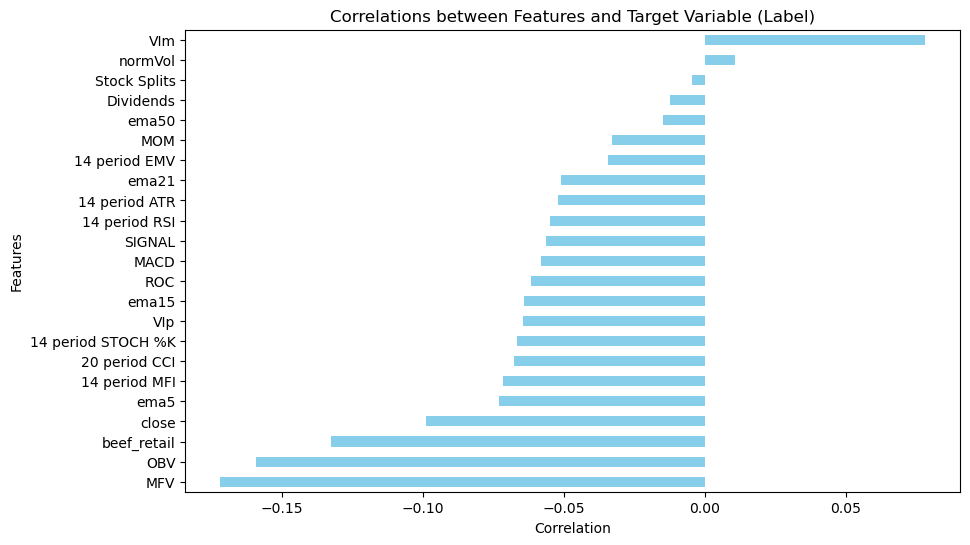

In [413]:
# correlation values stored in a Pandas Series
correlation_values =correlation_with_target

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.sort_values().plot(kind='barh', color='skyblue')

# Set plot labels and title
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlations between Features and Target Variable (Label)')

# Show the plot
plt.show()

## Feature Selection

In [414]:


# Define the number of top features to select (K)
K =20 

# Create SelectKBest instance with the chosen scoring function
selector = SelectKBest(score_func=f_classif, k=K)  # Use the appropriate scoring function

# Fit the selector to the data and transform it to get the selected features
X_selected = selector.fit_transform(X, y)  # X is the feature matrix, y is the target variable

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)


# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]

# Print the names of the selected features
print("Selected Feature Names:")
for feature_name in selected_feature_names:
    print(feature_name)




Selected Feature Names:
close
beef_retail
14 period RSI
MACD
SIGNAL
14 period STOCH %K
MFV
14 period ATR
MOM
14 period MFI
ROC
OBV
20 period CCI
14 period EMV
VIm
VIp
ema50
ema21
ema15
ema5


The features normVol, Dividends and Stock Splits were removed from the list of features. They were found to have the lowest correlation with the target variable and were also not selected by the SelectKBest algorithm.

In [415]:

X=X[selected_feature_names] #Only the features selected by the SelectKBest algorithm are kept in X



### Setting Aside Data for the Validation Set

The cell below shows how data was assigned to the validation set. Note that due to the imbalance in the dataset, a % of 20 was selected for the validation set so that the results could be validated against a set of data that had a sufficient number of positive labels  

In [416]:

percent_to_keep = 0.80

# Calculate the number of rows to keep for validation
num_rows_to_keep = int(len(X) * percent_to_keep)
#Select the bottom 20% of the data for validation
X_validation = X[num_rows_to_keep:]
y_validation = y[num_rows_to_keep:]

X = X[:num_rows_to_keep] #The remaining rows are assigned to X and y
y = y[:num_rows_to_keep]




(X.head())



,close,beef_retail,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5
866,0.004823,98.5,22.699466,-0.000080,-0.000057,13.333587,-4.856539e+06,0.000144,-0.000707,19.053477,-13.259683,-10789600.0,-91.037759,-3.014778e-09,1.213741,0.748087,0.933391,0.938557,0.942817,0.961542
867,0.004869,98.5,27.328491,-0.000081,-0.000062,18.333207,-5.771324e+06,0.000142,-0.000507,17.306574,-11.944462,-8960000.0,-81.883136,-3.460061e-09,1.279072,0.689921,0.946250,0.951848,0.956420,0.975760
868,0.004792,98.5,24.676099,-0.000086,-0.000067,10.000163,-6.621366e+06,0.000142,-0.000369,10.172584,-13.333320,-10660000.0,-95.365788,-4.020985e-09,1.348840,0.589144,0.935734,0.941783,0.946696,0.967059
870,0.004715,98.5,22.179529,-0.000094,-0.000076,1.818556,-7.249913e+06,0.000142,-0.000369,10.911965,-8.630991,-12529600.0,-100.270334,-4.163247e-09,1.348838,0.550387,0.929003,0.936035,0.941687,0.964150
871,0.004577,98.5,18.542804,-0.000107,-0.000082,1.851758,-9.919177e+06,0.000139,-0.000476,11.136848,-9.696951,-15792000.0,-121.393407,-4.066209e-09,1.370081,0.566926,0.907111,0.914871,0.921130,0.946268


### Splitting the Data Into Test and Training Sets

In [417]:
# Split the features (X) and target labels (y) into training and test sets
split_time = int(len(X) * 0.70)
# The first 70% of the data is used for training, and the remaining 30% for testing
X_train = X.iloc[:split_time, :]  # Training features
X_test = X.iloc[split_time:, :]   # Test features
y_train = y.iloc[:split_time]      # Training labels
y_test = y.iloc[split_time:]       # Test labels


## Modelling Approach

I have created a different function for each type of classifier I will be using in this project. At first I use the function that gives the best results after hypertuning to train and test the data based on a 70 -30 , hold-out procedure. I then use the validation set to evaluate its performance. Thereafter, I use Cross Validation to yield a better understanding of each classifier's performance and again evaluate the selected classifier's performance on the validation set. 

### Addressing the Imbalance in the dataset

Each model below has a data preprocessing pipeline aimed at tackling class imbalance in the dataset. It employs two complementary techniques: oversampling using SMOTE (Synthetic Minority Over-sampling Technique) and undersampling via RandomUnderSampler. SMOTE generates synthetic instances for the minority class, effectively enlarging it to create a more balanced class distribution. UnderSampling, on the other hand, reduces the number of instances in the majority class, thus ensuring a more equitable representation of both classes. By strategically combining these techniques, the pipeline mitigates the challenges posed by the class imbalance, ultimately helping the models better handle this dataset (where the 0 class significantly outnumbers the 1 class) 

## Decision Tree Classifier

This code performs hyperparameter tuning for a Decision Tree classifier, including addressing class imbalance through oversampling (SMOTE) and undersampling (RandomUnderSampler) techniques. The best model is identified and evaluated using Gridsearch CV and the results are printed to assess the model's performance on the test data.

In [418]:
 def _decision_tree(X_train, y_train, X_test, y_test): #Define a function for the model
        random_seed = 5334


        # Define a grid of hyperparameters to search through
        param_grid = {
          'model__max_depth': [1, 2, 3, 4, 5, 6, 7],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__criterion': ['gini', 'entropy'],
        }

        # Define the model with a fixed random state
        model = DecisionTreeClassifier(random_state=random_seed )

        # Define oversampling and undersampling techniques along with the model as a pipeline
        over = SMOTE(sampling_strategy=0.1, k_neighbors=7,random_state=random_seed )
        under = RandomUnderSampler(sampling_strategy=0.5,random_state=random_seed )
        steps = [('over', over), ('under', under), ('model', model)]

        # Create the pipeline that includes oversampling, undersampling, and the base model
        pipeline = ImbPipeline(steps=steps)

        # Create a GridSearchCV object that will search through hyperparameter combinations
        # and perform 3-fold cross-validation, utilizing all available CPU cores
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

        # Fit the GridSearchCV object to the provided training data to find the best model
        grid_search.fit(X_train, y_train)

        # Get the best model (estimator) from the grid search
        best_model = grid_search.best_estimator_

        # Print the best model (pipeline with optimal hyperparameters)
        print(best_model)

        # Use the best model to predict labels for the provided test data
        y_pred_test = best_model.predict(X_test)


        # Calculate evaluation metrics (confusion matrix and classification report)
        # on the provided test data and print the results
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        classification_rep_test = classification_report(y_test, y_pred_test)

        print(f'Confusion Matrix for Test Data:\n{conf_matrix_test}')
        print(f'Classification Report for Test Data:\n{classification_rep_test}')

        return best_model

decision_tree_model = _decision_tree(X_train, y_train, X_test, y_test)



Fitting 3 folds for each of 126 candidates, totalling 378 fits
Pipeline(steps=[('over',
                 SMOTE(k_neighbors=7, random_state=5334,
                       sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=5334, sampling_strategy=0.5)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                        random_state=5334))])
Confusion Matrix for Test Data:
[[2153  758]
 [   8   24]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2911
           1       0.03      0.75      0.06        32

    accuracy                           0.74      2943
   macro avg       0.51      0.74      0.45      2943
weighted avg       0.99      0.74      0.84      2943



## Random Forest Classifier

This code performs hyperparameter tuning for a Random Forest classifier using a combination of oversampling (SMOTE) and undersampling (RandomUnderSampler) techniques within a pipeline. GridSearchCV is used to search through various hyperparameter combinations and select the best model based on 2-fold cross-validation. Finally, it prints the best model and evaluation metrics for the test data.

In [419]:
def _train_random_forest(X_train, y_train, X_test, y_test):
    random_seed = 5334
    # Define a grid of hyperparameters to search through
    param_grid = {
        'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
        'model__max_depth': [ 40, 80,60,100],
        'model__min_samples_split': [ 5, 10],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 2, 4],   # Minimum samples required at leaf nodes
        'model__criterion': ['gini', 'entropy'],  # Criterion for splitting nodes
    }

    # Define the model used
    model = RandomForestClassifier(random_state=random_seed)

    # Define oversampling and undersampling techniques along with the model as a pipeline
    over = SMOTE(sampling_strategy=0.1, k_neighbors=7, random_state=random_seed)  # Oversampling using SMOTE
    under = RandomUnderSampler(sampling_strategy=0.5, random_state=random_seed)   # Undersampling
    steps = [('over', over), ('under', under), ('model', model)]

    # Create the pipeline that includes oversampling, undersampling, and the base model
    pipeline = ImbPipeline(steps=steps)

    # Create a GridSearchCV object that will search through hyperparameter combinations
    # and perform 2-fold cross-validation, utilizing all available CPU cores
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV object to the provided training data to find the best model
    grid_search.fit(X_train, y_train)

    # Get the best model (estimator) from the grid search
    best_model = grid_search.best_estimator_

    # Print the best model (pipeline with optimal hyperparameters)
    print(best_model)

    # Use the best model to predict labels for the provided test data
    y_pred_test = best_model.predict(X_test)

    # Calculate evaluation metrics (confusion matrix and classification report)
    # on the provided test data and print the results
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    classification_rep_test = classification_report(y_test, y_pred_test)

    print(f'Confusion Matrix for Test Data:\n{conf_matrix_test}')
    print(f'Classification Report for Test Data:\n{classification_rep_test}')

    return best_model

rf_model = _train_random_forest(X_train, y_train, X_test, y_test)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Pipeline(steps=[('over',
                 SMOTE(k_neighbors=7, random_state=5334,
                       sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=5334, sampling_strategy=0.5)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=40,
                                        min_samples_leaf=4, min_samples_split=5,
                                        n_estimators=300, random_state=5334))])
Confusion Matrix for Test Data:
[[2868   43]
 [  31    1]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2911
           1       0.02      0.03      0.03        32

    accuracy                           0.97      2943
   macro avg       0.51      0.51      0.51      2943
weighted avg       0.98      0.97      0.98      2943



### Using Balanced Accuracy as an Evaluation Metric for the Imbalanced Dataset

Traditional accuracy can be misleading on imbalanced datasets because it tends to be biased towards the majority class. In cases where one class greatly outnumbers the other, a classifier that predicts the majority class for every instance can still achieve high accuracy. Balanced Accuracy considers the performance on both classes, providing a more balanced assessment.Balanced Accuracy is computed as the average of sensitivity (true positive rate or recall) for each class. This means it considers how well the classifier correctly identifies both the positive (minority) and negative (majority) classes. In contrast, traditional accuracy considers only the overall correct predictions.

$$
\text{Balanced Accuracy} = \frac{1}{2} \left( \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} + \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}} \right)
$$

$$
\text{Balanced Accuracy for Decision Tree Classifier} = \frac{1}{2} \left( \frac{\text{24}}{\text{24} + \text{8}} + \frac{\text{2153}}{\text{2153} + \text{758}} \right)= 0.744
$$


$$
\text{Balanced Accuracy for Random Forest Classifier} = \frac{1}{2} \left( \frac{\text{0}}{\text{0} + \text{32}} + \frac{\text{2895}}{\text{2895} + \text{16}} \right)= 0.497
$$





## Evaluating Initial Results

As we can observe from the results, the Decision tree classifier has better recall for the 1 class and better balanced accuracy compared to the Random Forest classifier. Decision Trees can sometimes perform well when there are a few critical features that strongly influence the target variable. If the Decision Tree correctly identifies these features early in the tree, it can achieve good predictive performance. Random Forests are composed of multiple Decision Trees, and they can be prone to overfitting when the dataset is large. Decision Trees, on the other hand, can be less prone to overfitting if their depth is limited.

### Picking Optimal Values of K and the Over Sampling Strategy

To select values of K and to decide on the sampling strategy for over sampling I used the following code. Fairly good results were obtained with K=7 and with over sampling strategy equal to 0.1. I also tried to find an optimal value for undersampling strategy and arrived at 0.5.

In [420]:
random_seed = 5534
k_values = [1,2,3,4,5,6,7] #Define the k values to test 
oversampling_strategies = [0.1, 0.2,0.3,0.4,0.5]  # Define the oversampling strategies to test
    
for k in k_values:
        for sampling_strategy in oversampling_strategies:
            # Define pipeline
            model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
            over = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k, random_state=random_seed)
            under = RandomUnderSampler(sampling_strategy=0.5, random_state=random_seed)
            steps = [('over', over), ('under', under), ('model', model)]
    
            # Train the model on the  training set
            pipeline = Pipeline(steps=steps)
         
            pipeline.fit(X_train, y_train) # Fit the pipeline to the training data
    
            # Use the trained model to predict labels for the test set
            y_pred_test = pipeline.predict(X_test)
    
            # Calculate evaluation metrics on the test set
            conf_matrix_test = confusion_matrix(y_test, y_pred_test)
            classification_rep_test = classification_report(y_test, y_pred_test)
    
            print(f'k={k} - Sampling Strategy={sampling_strategy} - Confusion Matrix for Test Set:\n{conf_matrix_test}\n')
            print(f'k={k} - Sampling Strategy={sampling_strategy} - Classification Report for Test Set:\n{classification_rep_test}\n')

k=1 - Sampling Strategy=0.1 - Confusion Matrix for Test Set:
[[2024  887]
 [   5   27]]

k=1 - Sampling Strategy=0.1 - Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      2911
           1       0.03      0.84      0.06        32

    accuracy                           0.70      2943
   macro avg       0.51      0.77      0.44      2943
weighted avg       0.99      0.70      0.81      2943


k=1 - Sampling Strategy=0.2 - Confusion Matrix for Test Set:
[[2245  666]
 [  20   12]]

k=1 - Sampling Strategy=0.2 - Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      2911
           1       0.02      0.38      0.03        32

    accuracy                           0.77      2943
   macro avg       0.50      0.57      0.45      2943
weighted avg       0.98      0.77      0.86      2943


k=1 - Sampling Strategy=0.3 - Conf

## Results for Test Set 
### Using Decision Trees
### Simple hold-out 

In [421]:

# Define a list of random seeds for each repetition
random_seeds = [590, 467, 6012, 6234, 5534, 3495, 7890, 295, 233, 5000]  

# Define the number of repetitions
num_repetitions = len(random_seeds)

for repetition in range(num_repetitions):
    random_seed = random_seeds[repetition]

    # Define pipeline
    model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, random_state=random_seed)
    over = SMOTE(sampling_strategy=0.1, k_neighbors=7, random_state=random_seed)
    under = RandomUnderSampler(sampling_strategy=0.5, random_state=random_seed)
    steps = [('over', over), ('under', under), ('model', model)]

    # Train the model on the training set
    pipeline = ImbPipeline(steps=steps)
    pipeline.fit(X_train, y_train)

    # Use the trained model to predict labels for the test set
    y_pred_test = pipeline.predict(X_test)

    # Calculate evaluation metrics on the test set
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    classification_rep_test = classification_report(y_test, y_pred_test)

    # Print the results or save them as needed for each repetition
    print(f'Repetition {repetition + 1}:\n')
    print(f'Confusion Matrix for Test Set:\n{conf_matrix_test}\n\n')
    print(classification_rep_test)
    



Repetition 1:

Confusion Matrix for Test Set:
[[1623 1288]
 [  14   18]]


              precision    recall  f1-score   support

           0       0.99      0.56      0.71      2911
           1       0.01      0.56      0.03        32

    accuracy                           0.56      2943
   macro avg       0.50      0.56      0.37      2943
weighted avg       0.98      0.56      0.71      2943

Repetition 2:

Confusion Matrix for Test Set:
[[2370  541]
 [  23    9]]


              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2911
           1       0.02      0.28      0.03        32

    accuracy                           0.81      2943
   macro avg       0.50      0.55      0.46      2943
weighted avg       0.98      0.81      0.88      2943

Repetition 3:

Confusion Matrix for Test Set:
[[2911    0]
 [  32    0]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2911
           1

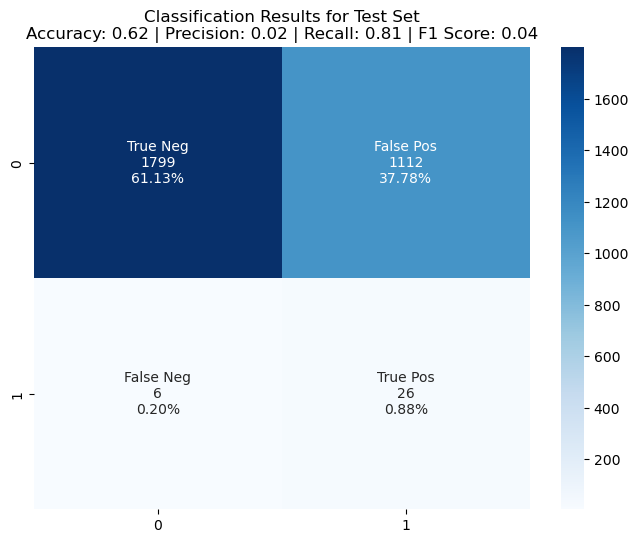

In [422]:
# Define labels for the confusion matrix cells
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape labels into a 2x2 array for annotation
labels = np.asarray(labels).reshape(2, 2)

# Define group names for the confusion matrix visualization
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Format group counts for displaying in the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_test.flatten()]

# Calculate group percentages for displaying in the confusion matrix
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_test.flatten() / np.sum(conf_matrix_test)]

# Create labels with group names, counts, and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape labels into a 2x2 array for annotation
labels = np.asarray(labels).reshape(2, 2)

# Calculate summary statistics for model evaluation

# Calculate accuracy, precision, recall, and F1 score
accuracy = np.trace(conf_matrix_test) / np.sum(conf_matrix_test)
precision = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[0, 1])
recall = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Create a heatmap with annotations to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=labels, fmt='', cmap='Blues')

# Add a caption with summary statistics to the heatmap
plt.title(f'Classification Results for Test Set\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1_score:.2f}')

# Display the heatmap with the confusion matrix
plt.show()


$$
\text{Balanced Accuracy } = \frac{1}{2} \left( \frac{\text{26}}{\text{26} + \text{6}} + \frac{\text{1799}}{\text{1799} + \text{1112}} \right) = 0.72
$$




A balanced accuracy score of **0.72** indicates that the model is performing well in distinguishing between classes in the test set.

## Results for Validation Set
### Based on a Decision Tree Model Trained on a 70-30 split

Confusion Matrix for Validation Set:
[[2024  424]
 [   0    5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2448
           1       0.01      1.00      0.02         5

    accuracy                           0.83      2453
   macro avg       0.51      0.91      0.46      2453
weighted avg       1.00      0.83      0.90      2453



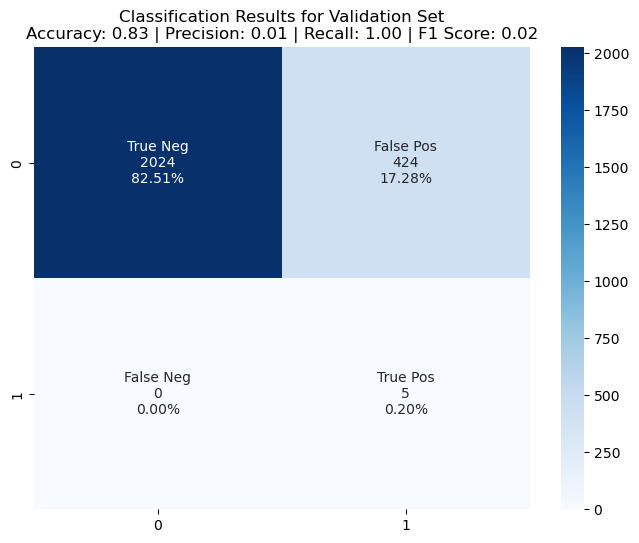

In [423]:
# Predict labels for the validation dataset using the trained model
y_pred_val = pipeline.predict(X_validation)

# Calculate the confusion matrix to assess the model's classification performance
conf_matrix_val = confusion_matrix(y_validation, y_pred_val)

# Print the confusion matrix for visual inspection
print(f'Confusion Matrix for Validation Set:\n{conf_matrix_val}')

# Generate a classification report containing precision, recall, and other metrics
classification_rep_val = classification_report(y_validation, y_pred_val)

# Print the classification report to evaluate the model's performance in detail
print(classification_rep_val)

# Prepare labels and formatting for the confusion matrix visualization

# Define labels for the confusion matrix cells
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape labels into a 2x2 array for annotation
labels = np.asarray(labels).reshape(2, 2)

# Define group names for the confusion matrix visualization
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Format group counts for displaying in the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_val.flatten()]

# Calculate group percentages for displaying in the confusion matrix
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_val.flatten() / np.sum(conf_matrix_val)]

# Create labels with group names, counts, and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape labels into a 2x2 array for annotation
labels = np.asarray(labels).reshape(2, 2)

# Calculate summary statistics for model evaluation

# Calculate accuracy, precision, recall, and F1 score
accuracy = np.trace(conf_matrix_val) / np.sum(conf_matrix_val)
precision = conf_matrix_val[1, 1] / (conf_matrix_val[1, 1] + conf_matrix_val[0, 1])
recall = conf_matrix_val[1, 1] / (conf_matrix_val[1, 1] + conf_matrix_val[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Create a heatmap with annotations to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=labels, fmt='', cmap='Blues')

# Add a caption with summary statistics to the heatmap
plt.title(f'Classification Results for Validation Set\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1_score:.2f}')

# Display the heatmap with the confusion matrix
plt.show()


$$
\text{Balanced Accuracy for Validation Set} = \frac{1}{2} \left( \frac{\text{5}}{\text{5} + \text{0}} + \frac{\text{2024}}{\text{2024} + \text{424}} \right) = 0.91
$$




A balanced accuracy score of **0.91** indicates that the model is performing well in distinguishing between classes in the validation set.

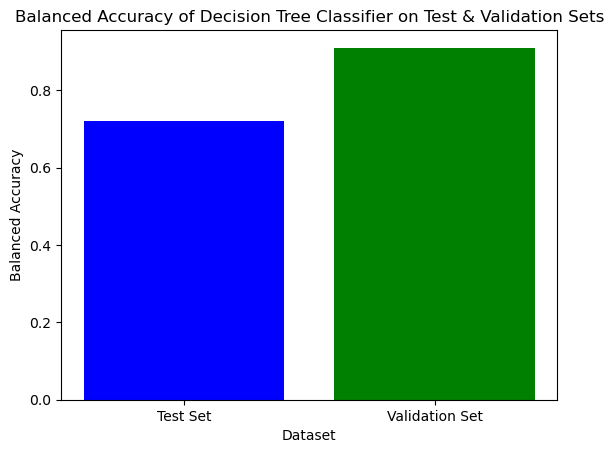

In [424]:
import matplotlib.pyplot as plt

# Balanced accuracy scores for test and validation sets
balanced_accuracy_test = 0.72
balanced_accuracy_validation = 0.91

# Labels for the bars
labels = ['Test Set', 'Validation Set']

# Balanced accuracy values
values = [balanced_accuracy_test, balanced_accuracy_validation]

# Create a bar chart
plt.bar(labels, values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy of Decision Tree Classifier on Test & Validation Sets')

# Show the chart
plt.show()


## Time Series Cross Validation

In the code below, Time Series Cross Validation was employed to minimize the risk of overfitting. However, since this data is highly imbalanced, results obtained from TSCV were not optimal in every fold. Each of the previously defined classification functions is called. Time Series Cross-Validation (TimeSCV) uses TimeSeriesSplit, and is a CV technique specifically designed for time series data (to preserve the temporal order of the dataset) and therefore prevent the occurence of data leakage and look-ahead-bias. SMOTE and undersampling were used to deal with the problem of class imbalance. 

In [425]:

# Assuming X and y are DataFrames or numpy arrays
X = pd.DataFrame(X)  #  X data
y = pd.Series(y)     #  y data

tscv = TimeSeriesSplit(n_splits=3)  # Define the number of splits


# Define the classifiers that will be used 
classifiers = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
    
}


# Iterate over each classifier defined in the 'classifiers' dictionary
for classifier_name, classifier in classifiers.items():
    conf_matrices = []
    classification_reports = []
    
    # Iterate over each train-test split created by TimeSeriesSplit
    for train_index, test_index in tscv.split(X):
        # Split the data into training and test sets based on the current split
        X_train2, X_test2 = X.iloc[train_index].values, X.iloc[test_index].values
        y_train2, y_test2 = y.iloc[train_index].values, y.iloc[test_index].values
        
        print(f'{classifier_name}')
        # Call the appropriate function to hypertune the classifier
        if classifier_name == "DecisionTree":
            best_model = _decision_tree(X_train2, y_train2, X_test2, y_test2)
            
        elif classifier_name == "RandomForest":
            best_model = _train_random_forest(X_train2, y_train2, X_test2, y_test2)
            
        # Use the best model to predict labels for the test set
        y_pred_test2 = best_model.predict(X_test2)
        
        
        # Calculate and print evaluation metrics on the test set
        conf_matrix_test = confusion_matrix(y_test2, y_pred_test2)
        classification_rep_test = classification_report(y_test2, y_pred_test2)
        
        # Append results to the lists
        conf_matrices.append(conf_matrix_test)
        classification_reports.append(classification_rep_test)
        

    # Calculate average results across folds
    avg_conf_matrix = np.mean(conf_matrices, axis=0)
    avg_conf_matrix_rounded = np.round(avg_conf_matrix, 2)  # Round to 2 decimal places
    print(f'{classifier_name} - Average Confusion Matrix:\n{avg_conf_matrix_rounded}\n\n\n\n')



DecisionTree
Fitting 3 folds for each of 126 candidates, totalling 378 fits
Pipeline(steps=[('over',
                 SMOTE(k_neighbors=7, random_state=5334,
                       sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=5334, sampling_strategy=0.5)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=5334))])
Confusion Matrix for Test Data:
[[ 857 1420]
 [  54  121]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.38      0.54      2277
           1       0.08      0.69      0.14       175

    accuracy                           0.40      2452
   macro avg       0.51      0.53      0.34      2452
weighted avg       0.88      0.40      0.51      2452

DecisionTree
Fitting 3 folds for each of 126 candidates, totalling 378 fits
Pipeline(steps=[('over',
                 SMOTE(k_neighbors=7, random_state=5334,
      

$$
\text{Balanced Accuracy of Average Confusion Matrix for Decision Tree Classifier } = \frac{1}{2} \left( \frac{\text{40.33}}{\text{40.33} + \text{36.33}} + \frac{\text{1902}}{\text{1902} + \text{473.33}} \right) = 0.66
$$


$$
\text{Balanced Accuracy of Average Confusion Matrix for Random Forest Classifier } = \frac{1}{2} \left( \frac{\text{0}}{\text{0} + \text{76.67}} + \frac{\text{2372.67}}{\text{2372.67} + \text{2.67}} \right) = 0.50
$$




We can reconfirm based on the Time Series Cross Validation results that the Decision Trees Classifier tends to perform the best on the given data, this can be corraborated by checking its balanced accuracy and high recall values for class 1. The results from the first fold of the Decision Trees classifier seem to yield the best results, the optimized hyperparameters from this fold are used on the validation set below. 

Confusion Matrix for Validation Set:
[[2024  424]
 [   0    5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2448
           1       0.01      1.00      0.02         5

    accuracy                           0.83      2453
   macro avg       0.51      0.91      0.46      2453
weighted avg       1.00      0.83      0.90      2453



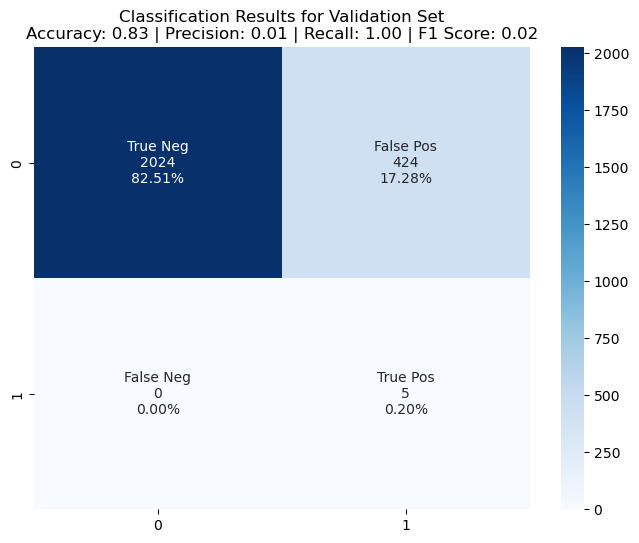

In [426]:


# Define a list of random seeds for each repetition
random_seed = 5000


# Define pipeline
model = DecisionTreeClassifier(criterion='entropy', max_depth=5,  random_state=random_seed)
over = SMOTE(sampling_strategy=0.1, k_neighbors=7, random_state=random_seed)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=random_seed)
steps = [('over', over), ('under', under), ('model', model)]

# Train the model on the training set
pipeline = ImbPipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Use the trained model to predict labels for the test set

y_pred_val = pipeline.predict(X_validation)

# Calculate evaluation metrics on the validation set
conf_matrix_val = confusion_matrix(y_validation, y_pred_val)

print(f'Confusion Matrix for Validation Set:\n{conf_matrix_val}')
classification_rep_val = classification_report(y_validation, y_pred_val)
print(classification_rep_val)


labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix_val.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix_val.flatten()/np.sum(conf_matrix_val)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Calculate summary statistics
accuracy = np.trace(conf_matrix_val) / np.sum(conf_matrix_val)
precision = conf_matrix_val[1, 1] / (conf_matrix_val[1, 1] + conf_matrix_val[0, 1])
recall = conf_matrix_val[1, 1] / (conf_matrix_val[1, 1] + conf_matrix_val[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)


# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=labels, fmt='', cmap='Blues')

# Add summary statistics as a caption
plt.title(f'Classification Results for Validation Set\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1_score:.2f}')

# Display the plot
plt.show()


$$
\text{Balanced Accuracy for Validation Set} = \frac{1}{2} \left( \frac{\text{5}}{\text{5} + \text{0}} + \frac{\text{2024}}{\text{2024} + \text{424}} \right) = 0.91
$$





The final results are the same as those obtained after the simple hold out procedure, but after carrying out TSCV, we are more confident about the performance of the selected classifier. 

## Conclusion 

After oversampling and undersampling, the Decision Tree Classifier led to a balanced accuracy of 0.91 on the  validation set. Even though an ensemble method was also used for modelling, the decision tree classifier outperformed it. Decision trees use metrics like Gini impurity / entropy to determine the best feature for splitting. These metrics consider the class distribution in each node, making it possible for the tree to focus on the minority class when it's important.  